Začneme tim, že načteme všechny potřebné baličky, a načteme všechny soubory. Ligandy Cytochromu a Drugbanku leži v promennych <b>cyto_ligands</b> a <b>drugs</b> resp

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
import pandas as pd
import seaborn as sns
import csv

with open('CHEMBL26-chembl_26_activity.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    cyto_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        pchembl = m['pChEMBL Value']
        if not pchembl:
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl))
        cyto_ligands.append(mol)

suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if m]


Bad key "text.kerning_factor" on line 4 in
/Users/hanchary/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
RDKit ERROR: [20:37:23] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:37:23] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [20:37:23] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [20:37:23] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [20:37:23] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [20:37:23] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:37:23] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [20:37:23] ERROR: Can't kekulize mol.  Unkekulized 

RDKit ERROR: [20:37:24] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [20:37:24] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:37:24] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [20:37:24] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:37:24] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [20:37:24] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [20:37:24] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [20:37:24] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [20:37:24] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [20:37:24] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [20:37:24] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [20:37:24] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [20:37:25] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [20:37:25] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [20:37:25] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [20:37:26] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [20:37:26] ERROR: Could not sanitize molecule ending on line 1151592


Dalé máme funkci <b>scaffold()</b> z cvika. Také některe operace dělamé několikkrat, takže, udělame pro té operaci funkci. Funkce <b>scaffoldsAndSmiles()</b> vezme seznam ligandů a vrati seznam scaffoldů a seznam SMILES. Funkce <b>scaffoldToLigands()</b> vratí slovnik scaffoldů, který obsahuje indeksy ligandů.

In [2]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff

def scaffoldsAndSmiles(mol_list):
    scaffolds = []
    scaffolds_smiles = []
    for i, el in enumerate(mol_list):
        scaff = scaffold(el)
        scaffolds.append(scaff)
        if scaff:
          scaffolds_smiles.append((i,Chem.MolToSmiles(scaff) ))
    return [scaffolds, scaffolds_smiles]

def scaffoldToLigandsIDs(smilesList):
    scaffoldsDict = {smiles:[] for idx, smiles in smilesList}
    for idx, smiles in smilesList:
         scaffoldsDict[smiles].append(idx)
    return scaffoldsDict

In [3]:
drugbank_scaffolds, drugbank_scaffolds_smiles = scaffoldsAndSmiles(drugs)
scaffolds2drugs = scaffoldToLigandsIDs(drugbank_scaffolds_smiles)
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)

RDKit ERROR: [20:37:26] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [20:37:28] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [20:37:28] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [20:37:28] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [20:37:29] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [20:37:29] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [20:37:30] Explicit valence for atom # 23 C greater than permitted
RDKit ERROR: [20:37:30] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [20:37:30] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [20:37:30] Explicit valence for atom # 40 C, 6, is greater than permitted
RDKit ERROR: [20:37:30] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [20:37:30] Explicit valence for atom # 31

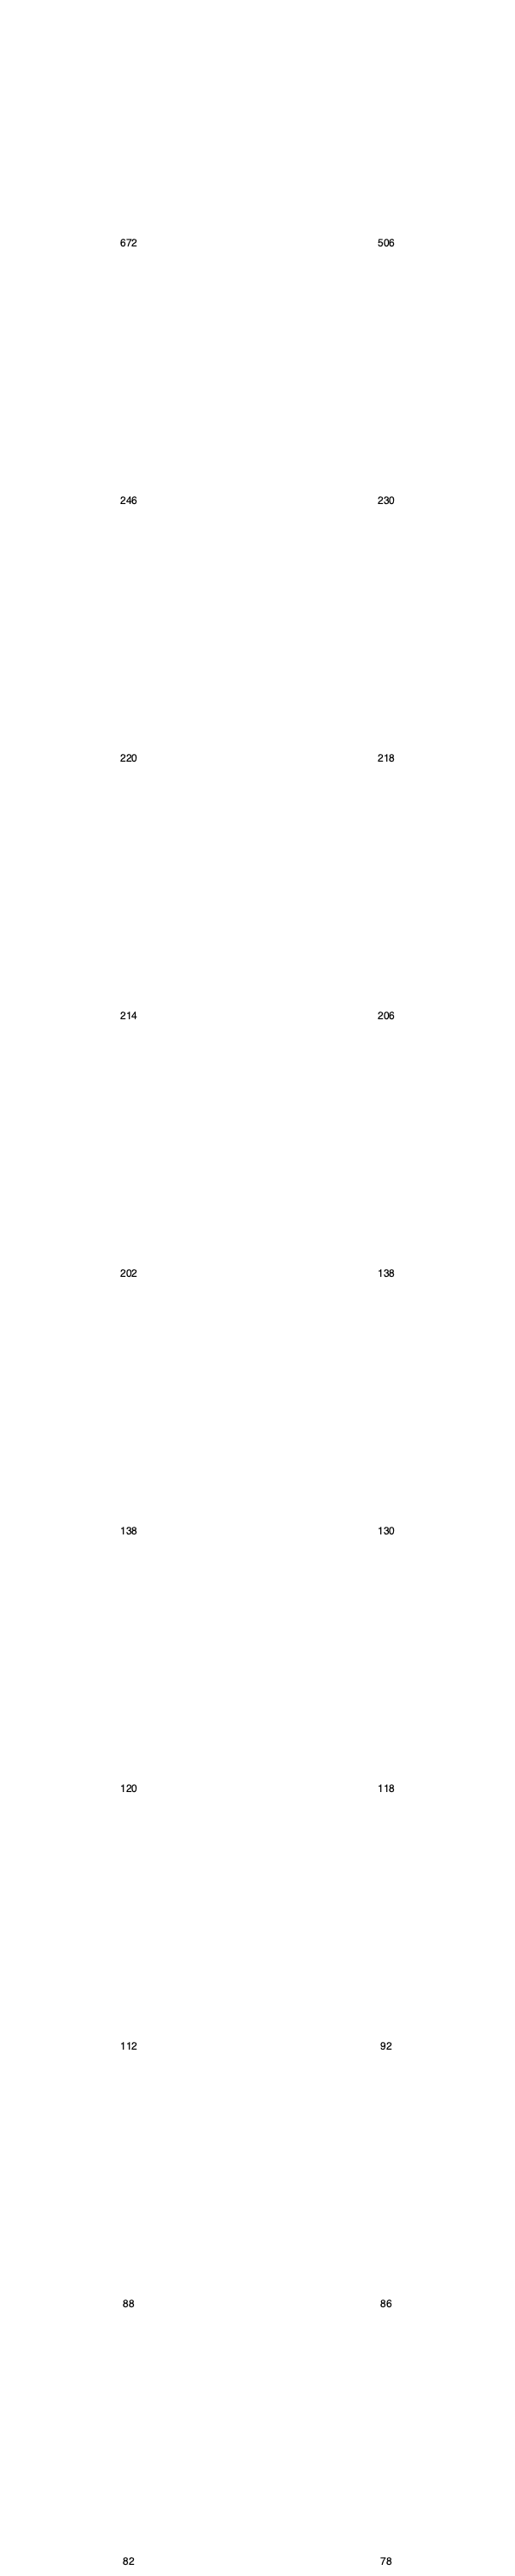

In [4]:
cyto_scaffolds, cyto_scaffolds_smiles = scaffoldsAndSmiles(cyto_ligands)
scaffolds2ligands = scaffoldToLigandsIDs(cyto_scaffolds_smiles)
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)

Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:20]])

In [8]:
scaffold_representatives = {}

for scaffold, ligands in scaffolds2ligands.items():
    scaffold_representatives[scaffold] = sorted(ligands,
                                                key=lambda x: cyto_ligands[x].GetProp('pChEMBL'),
                                                reverse=True)[0]

scaffold_representatives4visualization = []
for scaffold, ligandcount in scaffold_ligandcount:
    mol = Chem.MolFromSmiles(scaffold)
    mol.SetProp('legend', str(ligandcount) + " ligands")
    scaffold_representatives4visualization.append(mol)
    representative_mol = cyto_ligands[scaffold_representatives[scaffold]]
    representative_mol.SetProp('legend', "#{} | pChEMBL {}".format(str(scaffold_representatives[scaffold]),
                                                            representative_mol.GetProp('pChEMBL')))
    scaffold_representatives4visualization.append(representative_mol)

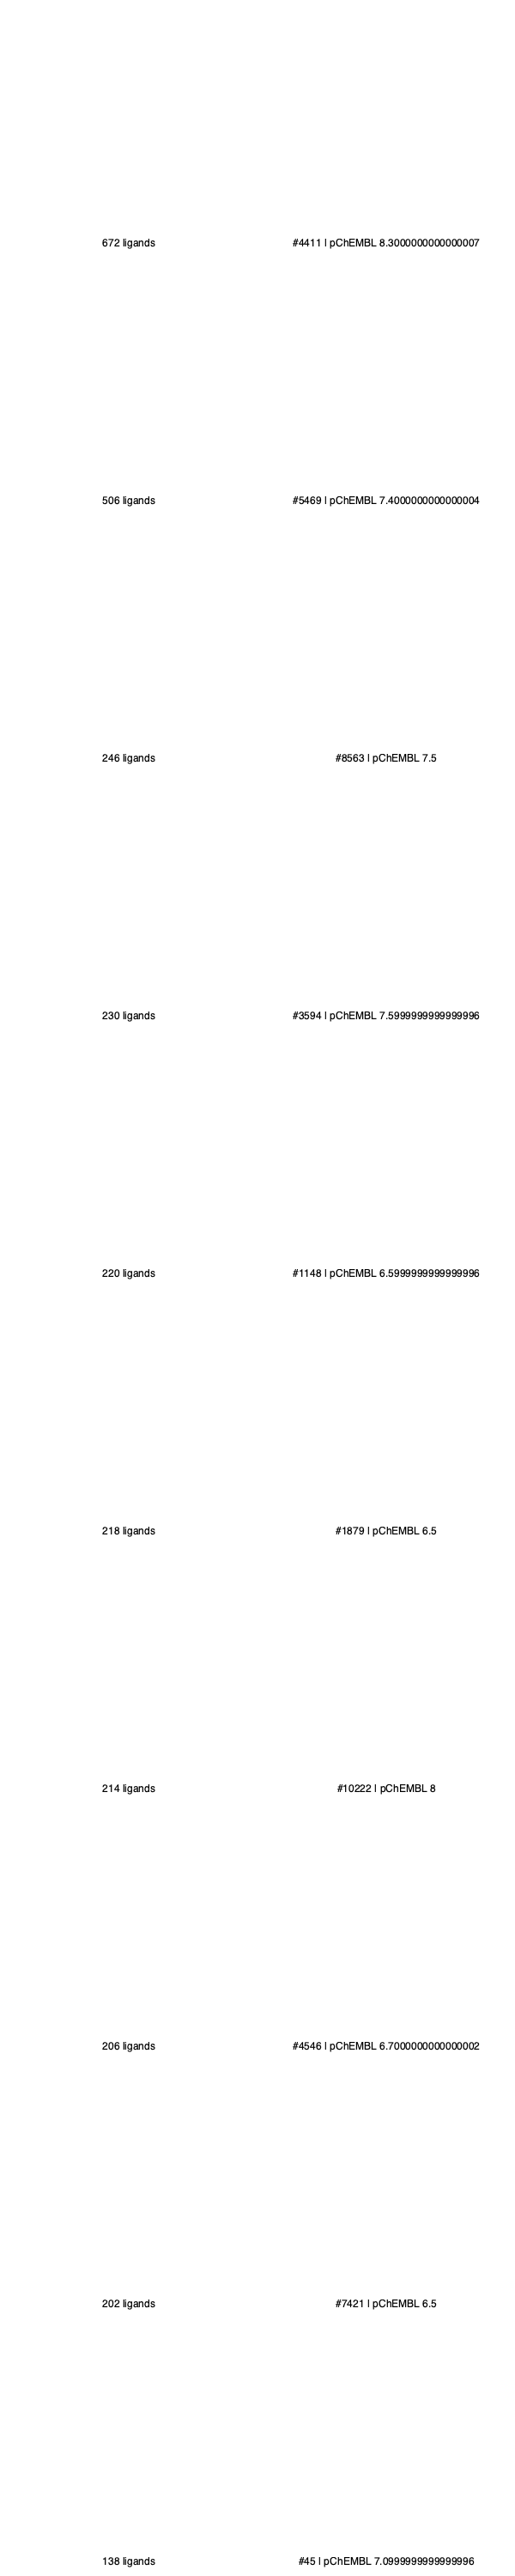

In [9]:
Draw.MolsToGridImage(scaffold_representatives4visualization[:20],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[:20]])

Takže, mám nějaký problem s RDKitem, a nevidim molekuly, tak alespoň zkusim nakreslit distribuci vah scaffoldů:

In [10]:
drugs_weight = [rdescriptors.CalcExactMolWt(Chem.MolFromSmiles(smile)) for smile, count in scaffold_drugcount]
ligands_weight = [rdescriptors.CalcExactMolWt(Chem.MolFromSmiles(smile)) for smile, count in scaffold_ligandcount]

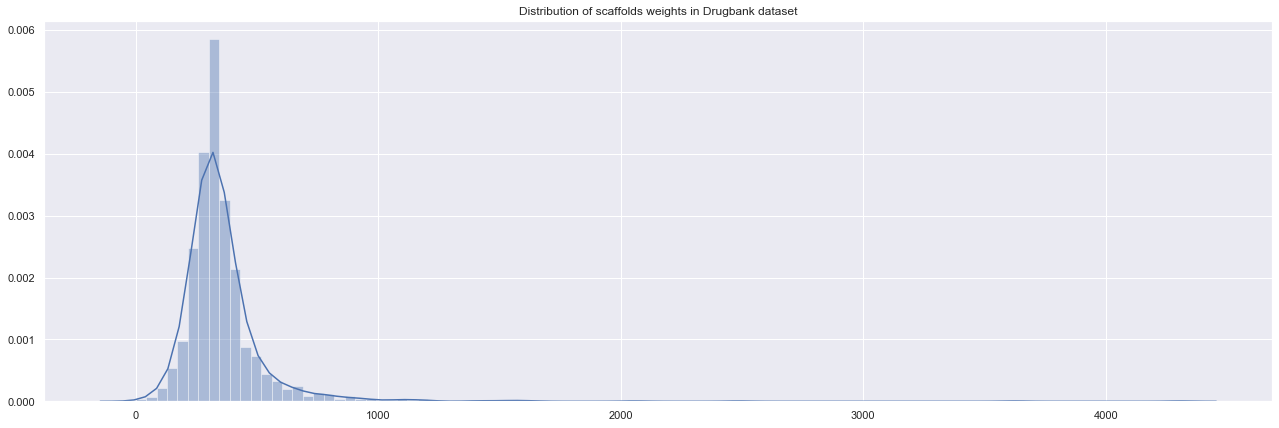

In [11]:
sns.set(rc={'figure.figsize':(22, 7)})
with sns.axes_style("darkgrid"):
    p = sns.distplot(drugs_weight, bins=100)
    p.set_title(f"Distribution of scaffolds weights in Drugbank dataset")

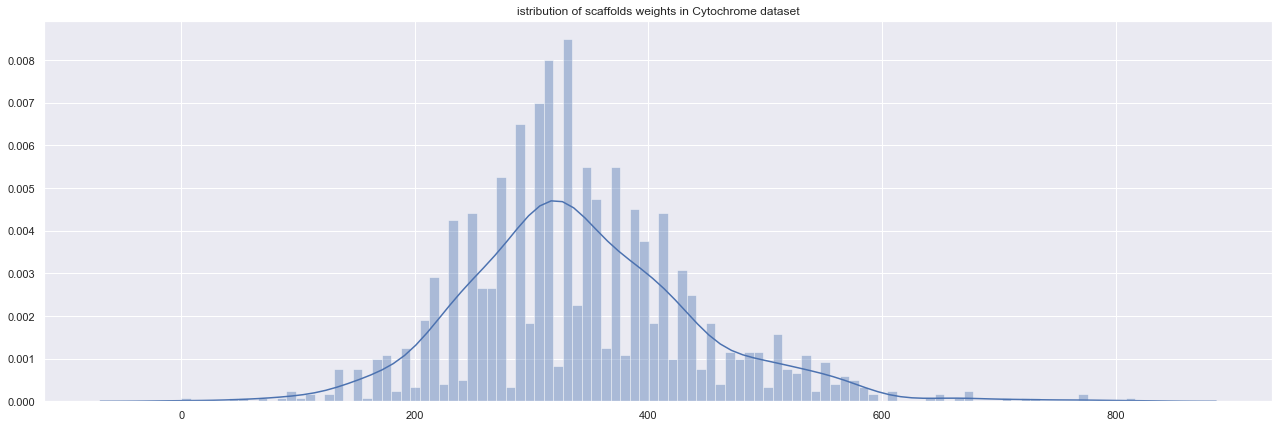

In [12]:
sns.set(rc={'figure.figsize':(22, 7)})
with sns.axes_style("darkgrid"):
    p = sns.distplot(ligands_weight, bins=100)
    p.set_title(f"istribution of scaffolds weights in Cytochrome dataset")

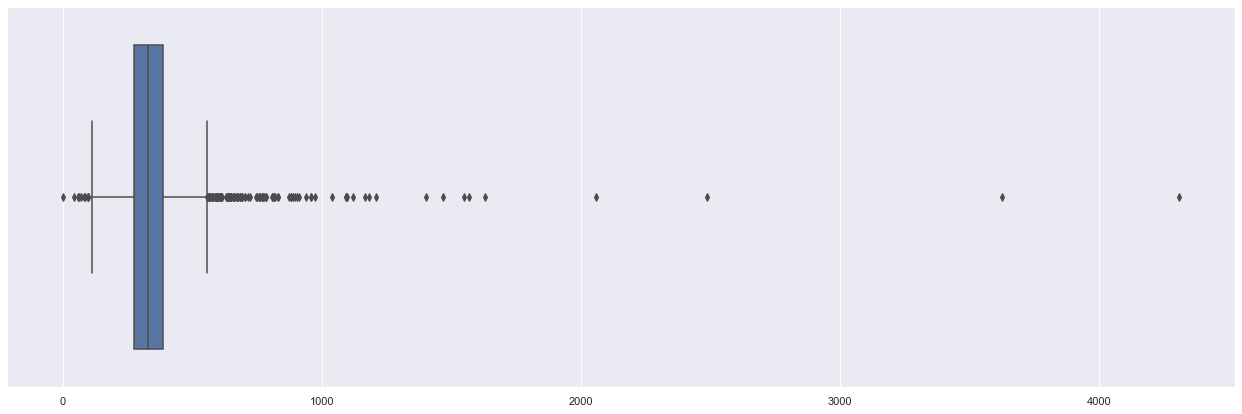

In [13]:
sns.boxplot(drugs_weight)

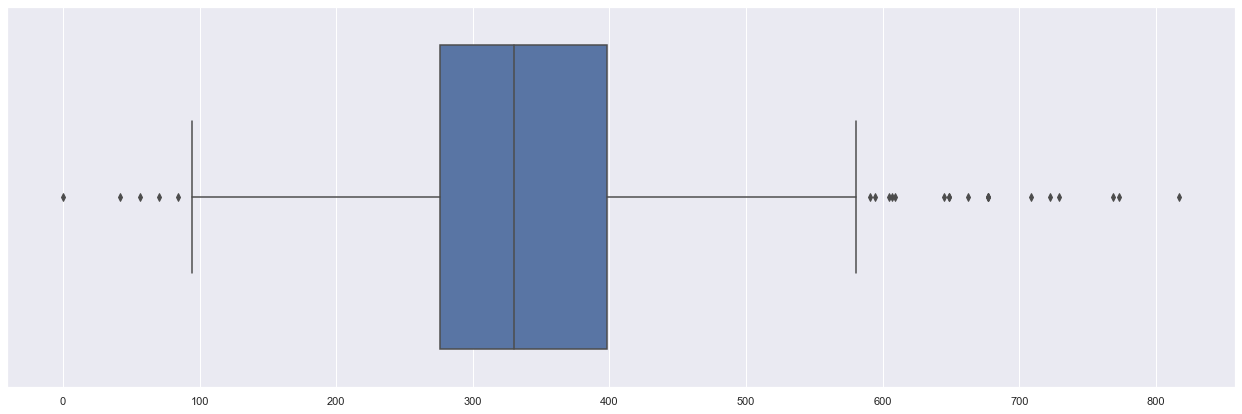

In [14]:
sns.boxplot(ligands_weight)

Takže, alespoň vidimé, že scaffoldy Drugbanku važí trochu vice v pruměru, a take maji hodně těžkých scaffoldů.